#### Os dados, até a data do presente estudo, estão no https://covid.saude.gov.br/
#### O presente arquivo é de 30 de junho. Atenção: de acordo com o dia em que for feita a análise, a última barra da totalização por semana estará menor.
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
#low_memory para ler mais rápido.
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\wagne\Análise\HIST_PAINEL_COVIDBR_08jul2020.xlsx'
df = pd.read_excel(filename)

In [3]:
df.shape
#linhas , colunas.

(568708, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568708 entries, 0 to 568707
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   regiao                  568708 non-null  object        
 1   estado                  568573 non-null  object        
 2   municipio               562744 non-null  object        
 3   coduf                   568708 non-null  int64         
 4   codmun                  564928 non-null  float64       
 5   codRegiaoSaude          562744 non-null  float64       
 6   nomeRegiaoSaude         562744 non-null  object        
 7   data                    568708 non-null  datetime64[ns]
 8   semanaEpi               568708 non-null  int64         
 9   populacaoTCU2019        566524 non-null  object        
 10  casosAcumulado          568708 non-null  int64         
 11  casosNovos              568708 non-null  int64         
 12  obitosAcumulado         568708

In [5]:
df.sample(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
137059,Nordeste,PB,Camalaú,25,250390.0,25005.0,5ª REGIAO,2020-05-21,21,6013,0,0,0,0,NaN,NaN,0.0
81078,Nordeste,PI,Francisco Ayres,22,220410.0,22011.0,VALE DOS RIOS PIAUI E ITAUEIRAS,2020-04-22,17,4348,0,0,0,0,NaN,NaN,0.0
233817,Nordeste,BA,Valença,29,293290.0,29027.0,VALENCA,2020-06-28,27,96562,519,58,16,2,NaN,NaN,0.0
335446,Sudeste,RJ,Itaperuna,33,330220.0,33007.0,NOROESTE,2020-04-06,15,103224,2,1,0,0,NaN,NaN,0.0
294016,Sudeste,MG,Peçanha,31,314860.0,31080.0,PECANHA/SAO JOAO EVANGELISTA,2020-06-11,24,17541,0,0,0,0,NaN,NaN,0.0
233136,Nordeste,BA,Uibaí,29,293240.0,29010.0,IRECE,2020-05-02,18,13887,0,0,0,0,NaN,NaN,0.0
293657,Sudeste,MG,Paula Cândido,31,314830.0,31061.0,VICOSA,2020-04-25,17,9571,0,0,0,0,NaN,NaN,0.0
91540,Nordeste,PI,São João da Fronteira,22,220987.0,22003.0,COCAIS,2020-06-23,26,6042,10,0,0,0,NaN,NaN,0.0
179534,Nordeste,AL,Maribondo,27,270480.0,27008.0,8ª REGIAO DE SAUDE,2020-07-03,27,13264,177,0,6,0,NaN,NaN,0.0
39438,Norte,TO,Cachoeirinha,17,170382.0,17002.0,BICO DO PAPAGAIO,2020-06-25,26,2275,9,0,0,0,NaN,NaN,0.0


In [6]:
#o groupby foi usado pra juntar todos da coluna estado junto com a coluna de casosAcumulados. 
#O max() foi usado pra pegar o número máximo de casos acumulados.
#O sort está ai para organizar, caso o "ascending" seja Falso a lista começará do menor para o maior. 
#Caso contrário será do maior para o menor.
df.groupby('estado')['casosAcumulado'].max().sort_values(ascending=False)

estado
SP    341365
CE    128471
RJ    126329
PA    118744
BA     95536
MA     92939
AM     80082
PE     67604
DF     64314
MG     64035
ES     58537
PB     56344
AL     42322
SC     36810
RN     36511
PR     35715
RS     35557
GO     32664
SE     32490
AP     30524
PI     28411
RO     25067
MT     23835
RR     19284
AC     15167
TO     13440
MS     11063
Name: casosAcumulado, dtype: int64

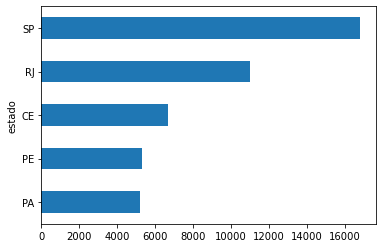

In [7]:
# Novamente o groupby para combinar os estados com o número de óbitos acumulados.
# Com o "tail(5)", pegamos apenas os 5 ultimos maiores casos.
# E o "plot" é usando para criar um gráfico. Kind='barh' especifica que as barrars serão na Horizontal. 
df.groupby('estado')['obitosAcumulado'].max().sort_values().tail(5).plot(kind='barh')

In [8]:
# Aqui a data dos acontecimentos foi especificada para mostar apenas o dia(%d) e o mês(%m).
df["data"] = df["data"].dt.strftime('%d/%m')

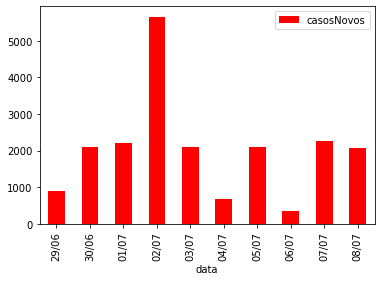

In [11]:
# Aqui análisamos os casos novos que apareceram por dia durante uma semana em São Paulo.
sp = df.query('municipio == "São Paulo"')
sp.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

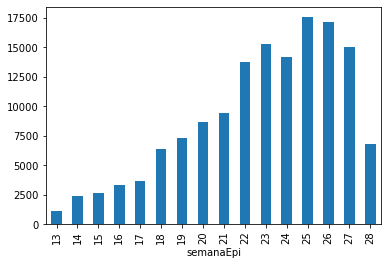

In [14]:
# Aqui é o gráfico dos casos novos por semana.
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')

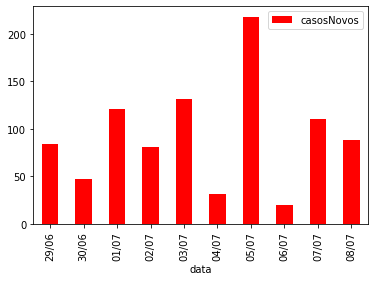

In [15]:
# Um gráfico mostrando os casos novos em SJC a cada dia dentro de uma semana.
sjc = df.query('municipio == "São José dos Campos"')
sjc.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

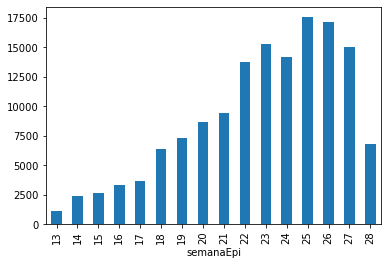

In [17]:
# Este é um gráfico mostrando o somatório dos casos novos das semanas.
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')